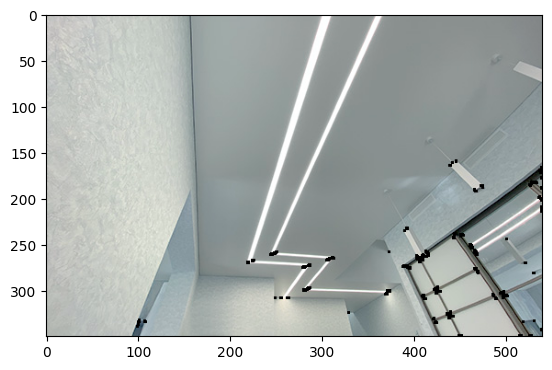

(<matplotlib.image.AxesImage at 0x238dd3a0a90>, None)

In [1]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

filename = 'lines.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,0]  
plt.imshow(img),plt.show()

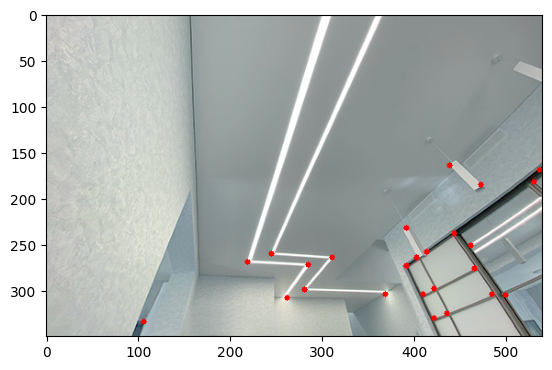

(<matplotlib.image.AxesImage at 0x238dd474490>, None)

In [3]:
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

In [4]:
#На первый взгляд кажется, что здесь куча непонятных цифр и странной информации, 
#но на самом деле все просто: weakClassifiers — набор слабых классификаторов, 
# на основе которых выносится решение о том, находится объект на изображении или нет, 
# internalNodes и leafValues — это параметры конкретного слабого классификатора. 
# Расшифровка internalNodes слева направо: первые два значения в нашем случае не используется, 
# третье — номер признака в общей таблице признаков (она располагается дальше в XML файле под тегом features), 
# четвертое — пороговое значение слабого классификатора. Так как у нас используется классификатор, 
# основанный на одноуровневых решающих деревьях (decision stump), 
# то если значение признака Хаара меньше порога слабого классификатора (четвертое значение в internalNodes), 
# выбирается первое значение leafValues, если больше — второе.

import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.imread('People.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import sys
import time

import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.05,
        minNeighbors=10,
        minSize=(30, 30),
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        img = cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        smile = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.2, minNeighbors=10,
                                               minSize=(25, 25), flags=cv2.CASCADE_SCALE_IMAGE)
        for (sx, sy, sw, sh) in smile:
            cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)

            # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 